# As 5 diferenças importantes entre Random Forest e AdaBoost:
## **1. Método de ensemble:**
## - Random Forest: Usa bagging (Bootstrap Aggregating)
## - AdaBoost: Usa boosting
## **2. Ponderação dos modelos:**
## - Random Forest: Todos os modelos (árvores) têm peso igual
## - AdaBoost: Os modelos são ponderados com base em seu desempenho
## **3.Construção sequencial:**
## - Random Forest: As árvores são construídas independentemente e em paralelo
## - AdaBoost: Os modelos são construídos sequencialmente, cada um focando nos erros do anterior
## **4. Tratamento de amostras:**
## - Random Forest: Usa amostragem aleatória com reposição (bootstrap)
## - AdaBoost: Ajusta os pesos das amostras após cada iteração, focando nas mal classificadas
## **5.Complexidade dos modelos base:**
## - Random Forest: Geralmente usa árvores profundas e completas
## - AdaBoost: Tipicamente usa modelos simples (stumps ou árvores rasas)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

In [2]:
# Gerando um conjunto de dados de classificação
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5,
                           n_redundant=5, n_classes=2, random_state=42)

In [3]:
# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# Criando e treinando o modelo AdaBoost
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200,
    algorithm="SAMME.R",
    learning_rate=0.5,
    random_state=42
)
ada_clf.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

In [5]:
# Fazendo previsões
y_pred = ada_clf.predict(X_test)

In [6]:
# Calculando a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do AdaBoost: {accuracy:.4f}")

Acurácia do AdaBoost: 0.9067


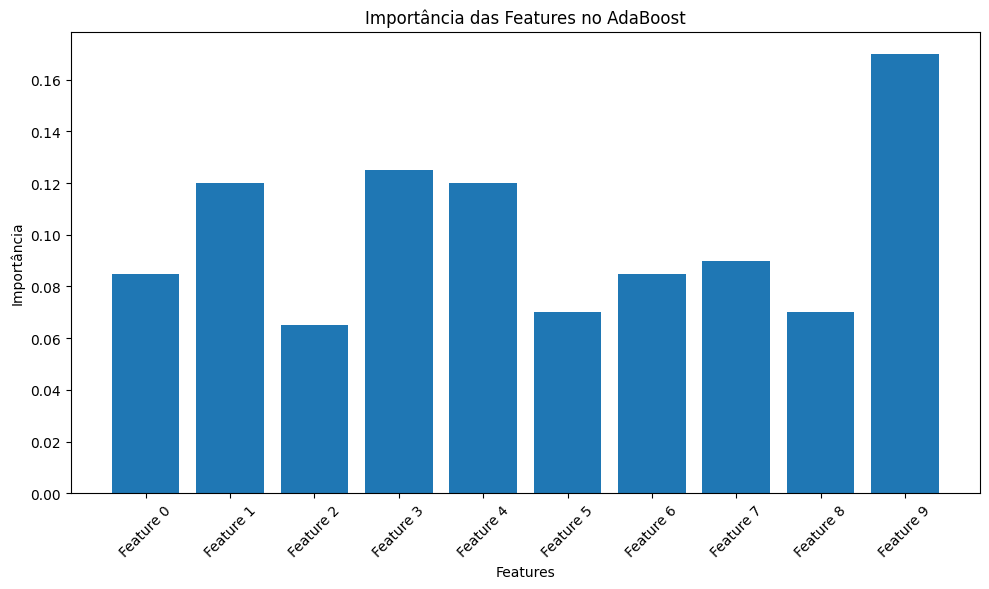

In [7]:
# Plotando a importância das features
feature_importance = ada_clf.feature_importances_
feature_names = [f"Feature {i}" for i in range(X.shape[1])]

plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importance)
plt.title("Importância das Features no AdaBoost")
plt.xlabel("Features")
plt.ylabel("Importância")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


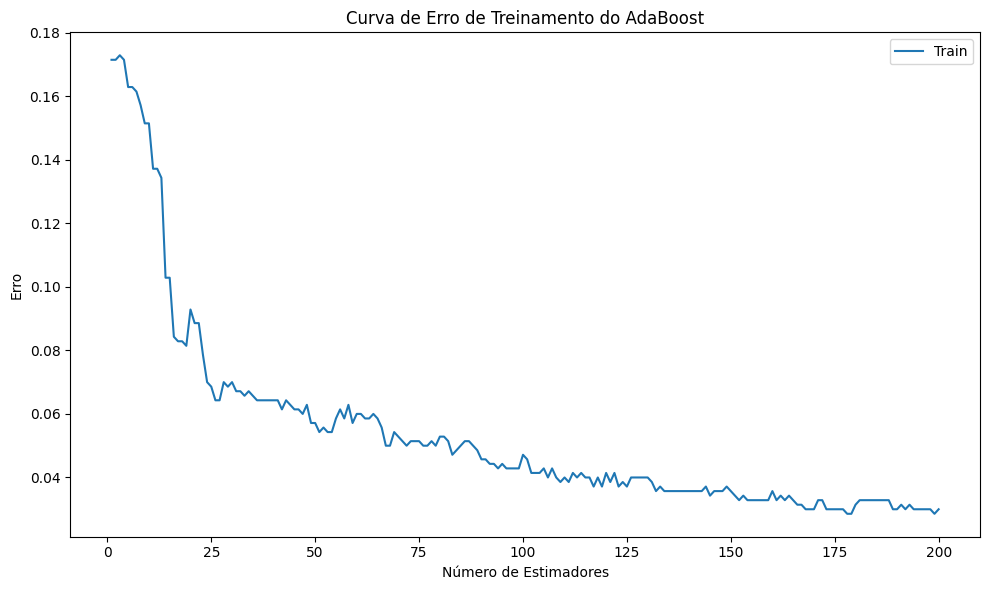

In [8]:
# Plotando a curva de erro de treinamento
train_errors = []
for y_pred_train in ada_clf.staged_predict(X_train):
    train_errors.append(1.0 - accuracy_score(y_train, y_pred_train))

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_errors) + 1), train_errors, label='Train')
plt.title("Curva de Erro de Treinamento do AdaBoost")
plt.xlabel("Número de Estimadores")
plt.ylabel("Erro")
plt.legend()
plt.tight_layout()
plt.show()

# Os 5 hiperparâmetros importantes no AdaBoost:
## **1. n_estimators:**
- O que é: Número de estimadores fracos (geralmente árvores de decisão) a serem treinados sequencialmente.
- Importância: Controla o tamanho do ensemble. Mais estimadores podem melhorar o desempenho, mas aumentam o tempo de computação e podem levar a overfitting.
## **2. learning_rate:**
- O que é: Taxa de aprendizado, também conhecida como "shrinkage".
- Importância: Controla a contribuição de cada classificador. Valores menores tornam o modelo mais robusto ao overfitting, mas podem requerer mais estimadores.
## **3. base_estimator:**
- O que é: O algoritmo de aprendizado base usado para construir o ensemble.
- Importância: Por padrão, são usadas árvores de decisão com profundidade 1 (stumps), mas pode-se especificar outros algoritmos ou árvores mais complexas.
## **4. algorithm:**
- O que é: O algoritmo de boosting a ser usado.
- Importância: Pode ser 'SAMME' (para classificação discreta) ou 'SAMME.R' (para classificação real). 'SAMME.R' geralmente converge mais rápido e tem melhor performance.
## **5. max_depth (do base_estimator):**
- O que é: A profundidade máxima das árvores de decisão base.
- Importância: Controla a complexidade dos classificadores base. Árvores mais profundas podem capturar relações mais complexas, mas são mais propensas a overfitting.

In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [10]:
# Carregando o conjunto de dados Iris
iris = load_iris()
X, y = iris.data, iris.target

In [11]:
# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# Definindo o modelo base
base_estimator = DecisionTreeClassifier(random_state=42)

In [15]:
# Criando o modelo AdaBoost
adaboost = AdaBoostClassifier(estimator=base_estimator, random_state=42)

In [19]:
# Definindo o grid de parâmetros para busca
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'estimator__max_depth': [1, 3, 5]
}

In [20]:
# Criando o objeto GridSearchCV
grid_search = GridSearchCV(adaboost, param_grid, cv=5, scoring='accuracy', n_jobs=-1)


In [21]:
# Realizando a busca em grade
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=42),
                                          random_state=42),
             n_jobs=-1,
             param_grid={'estimator__max_depth': [1, 3, 5],
                         'learning_rate': [0.01, 0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [22]:
# Imprimindo os melhores parâmetros encontrados
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)


Melhores parâmetros encontrados:
{'estimator__max_depth': 3, 'learning_rate': 0.01, 'n_estimators': 50}


In [23]:
# Obtendo o melhor modelo
best_model = grid_search.best_estimator_


In [24]:
# Fazendo previsões com o melhor modelo
y_pred = best_model.predict(X_test)

In [25]:
# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAcurácia do melhor modelo: {accuracy:.4f}")


Acurácia do melhor modelo: 1.0000


In [26]:
# Imprimindo o relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Relatório de Classificação:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

